In [1]:
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
import pandas as pd
# from IPython.display import display, Math, Latex, Markdown, HTML
# from sympy import *
from sympy.parsing.latex import parse_latex
import sympy as sp
import numpy as np
from string import Template
# from latex2sympy.process_latex import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
import json
import markdown
from markdown.extensions.toc import TocExtension
import uuid
import random
import math
import tqdm
# import copy
import seaborn as sns
# import requests
from Exercise import Exercise, Page, MarkdownBlock

from config import URL, TOKEN

Exercise.URL = "https://sympy-api.herokuapp.com/post"
Exercise.TOKEN = "TUDelftExerciseCreationToken"

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

sorted_indices = np.argsort(digits.target)
nums = digits.images[sorted_indices]

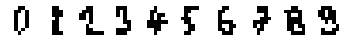

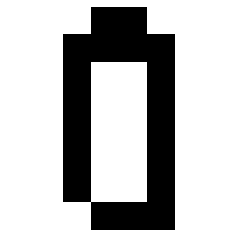

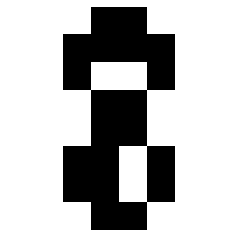

In [3]:
def to_binary(array):
    return np.where(array > 7, 1, 0)

def show(array, filename):
    data = np.where(array > 7, 1, 0)
    plt.matshow(data, cmap='gray_r')
    plt.axis('off')
    plt.savefig("{}.png".format(filename), dpi=500, bbox_inches='tight')
    plt.show()

f, axarr = plt.subplots(1,10)
unit = math.floor(len(nums)/10)
start_offset = math.floor((1/2)*unit)
for i in range(0, 10):
    axarr[i].axis('off')
    axarr[i].matshow(np.where(nums[start_offset + i*unit + 1] > 7, 1, 0), cmap="gray_r")

plt.savefig("all_digits.png", dpi=500, bbox_inches='tight') 
show(nums[7], "zero")
show(nums[1500], "eight")

<ipython-input-70-c56c4d41fc96>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-70-c56c4d41fc96>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])


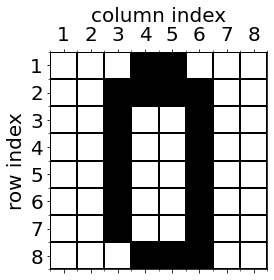

In [70]:
fig, ax = plt.subplots()

ax.set_xlabel("column index")
ax.xaxis.set_label_position('top')
ax.set_xticklabels([i for i in range(0, 9)])

ax.set_ylabel("row index")
ax.yaxis.set_label_position('left') 
ax.set_yticklabels([i for i in range(0, 9)])

data = np.where(nums[7] > 7, 1, 0)
# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.matshow(data, cmap='gray_r')

plt.savefig("zero_with_lables.png", dpi=500, bbox_inches='tight')
plt.show()

In [71]:
p = Page()
p.reset()

In [72]:
t1 = """
### Learning Goals
In this tutorial you will learn:

- Definitions of elementary data structures in linear algebra and operations on these;
- How the data structures can be used to model real-world artifacts (hand written digits);
- How operations on these data structures can be used to compare digital representations of hand written digits;
- The K-Nearest-Neighbours (KNN) algorithm to predict the digit in an unseen image.
"""
m = MarkdownBlock(t1)
m.write("Learning Goals")

t2 = """
### Nintendo DS Brain Training
You are hired by Nintendo to create some software to recognize user-written digits in the Brain Training game.
This is crucial element in the user interaction and therefore for the success of the game.
Answering by writing is way cooler then pressing the correct number on a virtual numpad.
You are given a digital representation of the input image and should provide a prediction of the corresponding digit.
This concept is formally known as [Optical Character Recognition](https://en.wikipedia.org/wiki/Optical_character_recognition).

<p align="center">
    <a title="쿠도군, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:NDSL-Brain_Training_Korean_Version.png"><img width="300" alt="NDSL-Brain Training Korean Version" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/NDSL-Brain_Training_Korean_Version.png/512px-NDSL-Brain_Training_Korean_Version.png"></a>
</p>
"""
m = MarkdownBlock(t2)
m.write("Nintento DS Brain Training")

t3 = """
### The MNIST Dataset

To keep things simple throughout this tutorial, we will use a low resolution (8 by 8 pixels), binary (each pixel is either 0 (white) or 1 (black), representation of such digits.

<p align="center">
    <img src="all_digits.png" alt="" width="700"/>
    <span class="img_caption" style="display: block; text-align: center;">Examples of hand-written digits</span>
</p>

A large dataset exists containing these images and corresponding labels (the digits being represented), called the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database).
"""
m = MarkdownBlock(t3)
m.write("The MNIST Dataset")


In [73]:
e = """
Classify the image below by typing the corresponding digit in the answer box.

<p align="center">
<img src="zero.png" alt="" width="150"/>
</p>
"""

feedback = """
Yes, that's right!
We humans generally do a good job classifying digits.
Our brains have seen many similar (hand-written) $0$'s before, stored in long term memory.
We compare the current $0$ to $0$'s seen earlier and classify it as similar.
Our final computer-based KNN-algorithm will do something similar.
"""

e1 = Exercise(e)
e1.add_answer(0, True, feedback)
e1.add_default_feedback("Hmm, that's not right. Both humans and computers make mistakes from time to time. Give it another try!")
e1.write("classify_0")

In [74]:
e = """
Classify the image below by typing the corresponding digit in the answer box.

<p align="center">
<img src="eight.png" alt="" width="150"/>
</p>
"""

e2 = Exercise(MarkdownBlock(e))
e2.add_answer(8, True, "Yes, that's right! Again you did an excellent job. Next we will learn how this can be automated!")
e2.add_default_feedback("Hmm, that's not right. Both humans and computers make mistakes from time to time. Give it another try!")
e2.write("classify_8")

In [75]:
p.append((MarkdownBlock(t1), [e1, e2]))

In [105]:
md_2 = r"""
### Matrix
In mathematics we can represent a digit image in a data structure called a matrix.
You can think of a matrix as a grid with rows and columns forming cells, like in Excel or Google Sheets.
In our image, each cell is a pixel, and a pixel is either 0 (white) or 1 (black).

The digit

<p align="center">
    <img src="zero_with_lables.png" alt="" width="180"/>
</p>

corresponds to the matrix

<p align="center">
    $M = @m$
</p>

We humans likely find the image easier to recognize,
while computers prefer the concrete values in the matrix over analog colours shown on your display.

In mathematics, a matrix is referred to by a capital letter, like as $M$.
The values in the cells can be referenced by subscripting the corresponding non-capital letter $m$
with the row- and column index, $i$ and $j$ respectively, separated by a comma, like so: $m_{i, j}$.
For example, in the matrix $M$ above, $m_{2, 3} = 1$ and $m_{3, 2} = 0$.
"""

params = {}
params["m"] = sp.Matrix(to_binary(nums[7]))
m = MarkdownBlock(md_2, params)
m.write("matrix")

In [77]:
e = """
Consider the matrix $A$ below, what is the value at $a_{3, 5}$?
<p align="center">
$A = @a$
</p>
"""

params = {}
arr = np.arange(25).reshape((5,5))
params["a"] = sp.Matrix(arr)

e3 = Exercise(MarkdownBlock(e, params))
e3.add_answer(sp.simplify(arr[2,4]), True, "Correct!")
e3.add_answer(sp.simplify(arr[4,2]), False, "🤔 You seem to have swapped the row and column index.")
e3.write("matrix")

In [78]:
p.append((m, [e3]))

In [79]:
md_3 = """
### Difference Matrix 
Given two matrices, how can we determine their similarity?
For this, we use the notion of distance.
A simple distance measure is to count the number of overlapping places, "the pixels on which they agree".
Given two matrices $A$ and $B$, their similarity can be represented by the distance matrix $S$:

$s_{i,j} = \\begin{cases}
    0 &\\text{if } a_{i,j} = b_{i,j} \\text{ "the pixels agree"} \\\\
    1 &\\text{if } a_{i,j} \\neq b_{i,j} \\text{ "the pixels disagree"}
    \\end{cases}$
    
Example:

In maths:

<p align="center">
    $A = @a$, $B = @b$, $S = @s$
</p>


and corresponding visuals:

<p align="center">
    <img src="similarity_single.png" alt="" width="400"/>
</p>
"""

i0 = np.array([1,0,1,
               1,0,1,
               1,1,1]).reshape((3,3))
i1 = np.array([0,0,0,
               1,0,1,
               1,1,1]).reshape((3,3))

params_text = {}
params_text["a"] = sp.Matrix(i0)
params_text["b"] = sp.Matrix(i1)
params_text["s"] = sp.Matrix(np.abs(i0 - i1))
m = MarkdownBlock(md_3, params_text)
m.write("difference matrix")

In [80]:
e_4 = """
Compute the similarity matrix between $A$ and $B$, given the similarity metric defined above.

$A = @a, B = @b$
"""

params = {}

a = np.array([1,0,1,1])
b = np.array([0,1,1,0])

params["a"] = sp.Matrix(2, 2, a)
params["b"] = sp.Matrix(2, 2, b)

e4 = Exercise(MarkdownBlock(e_4, params))
e4.add_answer(sp.Matrix(2,2, np.abs(a - b)), True, "Yes!")
e4.write("difference_matrix")

In [81]:
p.append((m, [e4]))

In [82]:
md4 = """
### Distance Score
We can reducre the distance matrix $S$ to a distance score by taking it's sum, that is: add together all values.

The maximum distance score is 64, since there are 64 pixels in each image.
The lower the distance score, the more similar two images are.
We can see that a $0$ is more similar to another $0$ than to a $9$, because the distance score is lower.

<p align="center">
    <img src="similarity.png" alt="" width="300"/>
</p>
"""

md4 = MarkdownBlock(md4)
md4.write("Distance Score")

In [83]:
e5 = """
Given distance matrix $S$, what is the distance score corresponding to $S$?

$S = @s$
"""

params = {}
data = [np.random.randint(0,2) for _ in range(9)]
s = sp.Matrix(3, 3, data)
params["s"] = s

e5 = Exercise(MarkdownBlock(e5, params))
e5.add_answer(sp.simplify(np.array(data).sum()), True, MarkdownBlock("Correct!"))
e5.write("distance_score")

In [84]:
e6 = """
Given matrices $A = @a$ and $B = @b$, what is their distance score?
"""

a = [np.random.randint(0,2) for _ in range(9)]
b = [np.random.randint(0,2) for _ in range(9)]

params = {}
params["a"] = sp.Matrix(3,3, a)
params["b"] = sp.Matrix(3,3, b)

e6 = Exercise(MarkdownBlock(e6, params))
ans = np.abs(np.array(a) - np.array(b)).sum()
e6.add_answer(sp.simplify(ans), True, "Yes!")
e6.write("distance_score_from_scratch")

In [85]:
p.append((md4, [e5, e6]))

In [104]:
md5 = """
### From distance score to 'neighbour'
The distance score can be used do define the notion of neighbour proximity.
The lower the distance score, the closer the neighbour.

In the image below, the digit on the left is an unseen digit, we want to determine whether it is a $0$ or a $9$.
We compute the distance score between this unknown digit and a dataset with the same amount of $0$'s and $9$'s for which we know the digit number.

<p align="center">
    <img src="neighbours_text.png" alt="" width="800"/>
</p>

We sort the computed distance scores and only consider the $K$ lowest distances.
The majority of the known digit numbers belonging to those distances determines whether we classify this unseen digit as a $0$ or a $9$.
In the image above, if we take $K=5$, the digits are $0,0,0,9,0$, of which the majority is $0$, so we classify this digit as a $0$.

In the image below, one can see that the differences between digits of the same class are generally smaller than differences between classes.
In other words, an arbitrary four is likely more similar to another four then to another digit ($K=1$).
With a higher value for $K$, accuracy is expected to go up.
What the ideal value is for $K$ and how to determine this is yet to be seen.

<p align="center">
    <img src="cross.png" alt="" width="800"/>
</p>
"""
md5 = MarkdownBlock(md5)
md5.write("knn")

In [87]:
e = """
Consider the dataset below:

<p align="center">
    <img src="neighbours_exercise.png" alt="" width="800"/>
</p>

How is the digit on the left classified when $K=3$?
"""

e = Exercise(e)
e.add_answer(sp.simplify(0), True, "Indeed! The labels are: $0,0,9$, therefore the majority vote is $0$!")
e.write("knn_1")

In [88]:
e2 = """
Consider the dataset below again:

<p align="center">
    <img src="neighbours_exercise.png" alt="" width="800"/>
</p>

How is the digit on the left classified when $K=4$?
"""

fb = "It could be either a $0$ or a $9$, we didn't specify the rules for a tie in similarity-scores, nor for a tie between classes"
e2 = Exercise(e2)
e2.add_answer(sp.simplify(0), True, fb)
e2.add_answer(sp.simplify(9), True, fb)
e2.write("knn_2")

In [89]:
p.append((md5, [e, e2]))

In [60]:
md = """
### To be continued...

- performance evaluation: confusion matrix for simplest complex case -> binary case (0 or 9)
- extending to multi-class classification
- extending to non-binary images
- higher resolution images (i.e. more dimensions)
- other distance functions
- preprocessing the data (e.g. first derivative)
- other classifyers (gradient boosting, decision trees, neural networks, PCA etc.) should be good to demonstrate, understand and execute by hand on the MNIST problem
- extending to EMNIST dataset

<img src="six_new.png" alt="" width="400"/>
"""
md = MarkdownBlock(md)
md.write("tbc")

In [91]:
p.append((md, []))
p.write()

Data written succesfully.


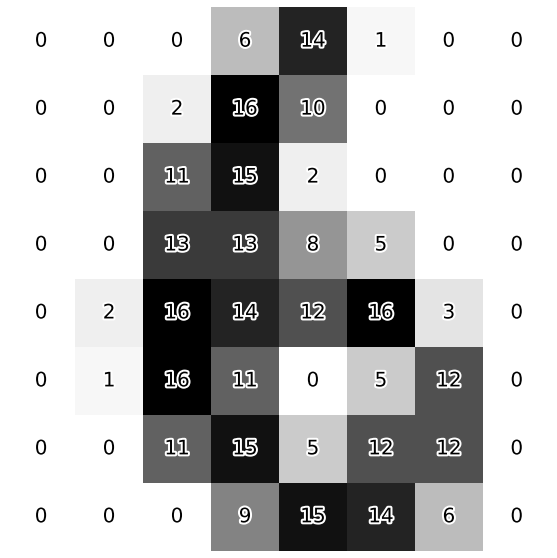

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.axis("off")
axes.matshow(nums[1103], cmap="Greys")

# plt.savefig("six_new.png", dpi=500, bbox_inches='tight')

import matplotlib.patheffects as pe
for (i, j), z in np.ndenumerate(nums[1103]):
    axes.text(j, i, '{}'.format(int(z)), ha='center', va='center', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

plt.savefig("six_new.png", dpi=500, bbox_inches='tight')
    
plt.show()



In [93]:
e = """
$@m$
"""

params = {}
ans = sp.Matrix([1,2,3,4])
params["m"] = ans

e = Exercise(MarkdownBlock(e, params))
e.add_answer(ans, True, MarkdownBlock("YESS!!"))
e.write()

t.append((MarkdownBlock(""), [e]))
t.write()

AttributeError: 'tuple' object has no attribute 'append'

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


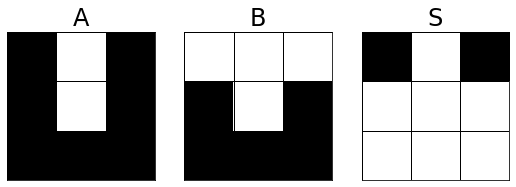

In [94]:
def show_grid(ax):
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
print(axes)
axes[0].set_title("A")
axes[1].set_title("B")
axes[2].set_title("S")

i0 = np.array([1,0,1,
               1,0,1,
               1,1,1]).reshape((3,3))
i1 = np.array([0,0,0,
               1,0,1,
               1,1,1]).reshape((3,3))

show_grid(axes[0])
axes[0].matshow(i0, cmap="gray_r")

show_grid(axes[1])
axes[1].matshow(i1, cmap="gray_r")

show_grid(axes[2])
similarity_matrix = sp.Matrix((i0 - i1)**2)
numpy_sim_matrix = np.array(similarity_matrix).astype(np.int32)
axes[2].matshow(numpy_sim_matrix, cmap="gray_r", vmin=0, vmax=1)

plt.savefig("similarity_single.png", dpi=500, bbox_inches='tight')

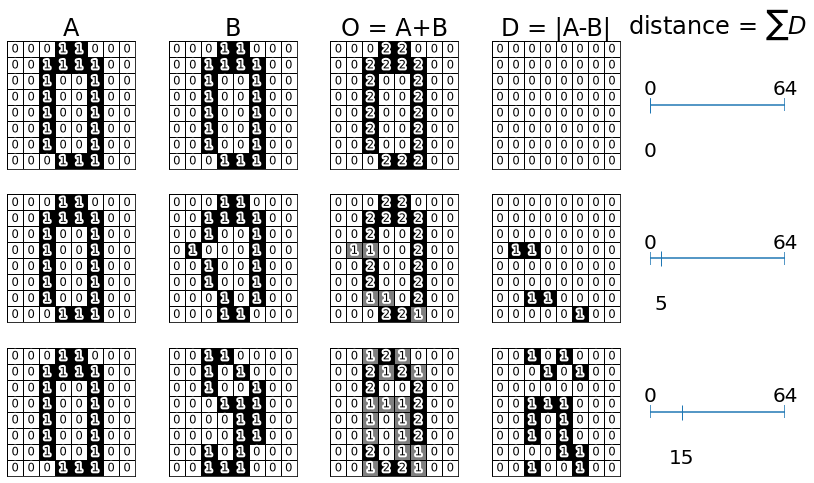

In [26]:
tuples = [(nums[7], nums[7]),
          (nums[7], nums[1]),
          (nums[7], nums[1700])]

fig, axes = plt.subplots(nrows=len(tuples), ncols=5, figsize=(14, 8))

def show_grid(ax):
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

axes[0][0].set_title("A")
axes[0][1].set_title("B")
axes[0][2].set_title("O = A+B")
axes[0][3].set_title("D = |A-B|")
axes[0][4].set_title("distance = $\sum D$")

for i, t in enumerate(tuples):
    cmap = 'gray_r'
    i0 = to_binary(t[0])
    i1 = to_binary(t[1])
    
    show_grid(axes[i][0])
    axes[i][0].matshow(i0, cmap=cmap)

    show_grid(axes[i][1])
    axes[i][1].matshow(i1, cmap=cmap)
    
    show_grid(axes[i][2])
    o = i0 + i1
    axes[i][2].matshow(o, cmap=cmap)

    show_grid(axes[i][3])
    similarity_matrix = sp.Matrix((i0 - i1)**2)
    numpy_sim_matrix = np.array(similarity_matrix).astype(np.int32)
    axes[i][3].matshow(numpy_sim_matrix, cmap=cmap, vmin=0, vmax=1)
    
    import matplotlib.patheffects as pe
    for a_index, a_mtx in enumerate([i0, i1, o, numpy_sim_matrix]):
        for (i_loop, j_loop), z in np.ndenumerate(a_mtx):
            value = ""
            try:
                value = int(z)
            except:
                value = ""
            axes[i][a_index].text(j_loop, i_loop, '{}'.format(value), ha='center', va='center', path_effects=[pe.withStroke(linewidth=4, foreground="white")], fontsize="xx-small") 

    draw_numberline(numpy_sim_matrix.sum(), axes[i][4])

plt.savefig("similarity.png", dpi=500, bbox_inches='tight')

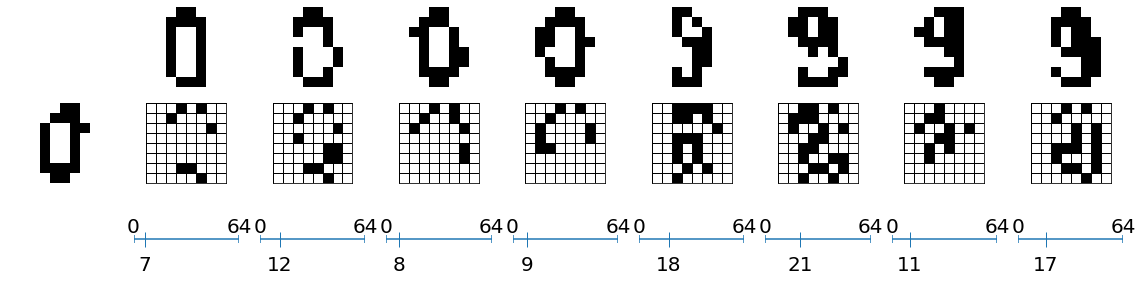

In [100]:
data = [nums[7], nums[9], nums[10], nums[11],
        nums[1700], nums[1701], nums[1702], nums[1703]]

data_exercise = [nums[12], nums[21], nums[22],
        nums[1702], nums[1718], nums[1720]]

fix, axes = plt.subplots(nrows=3, ncols=len(data)+1, figsize=(20,5))

axes[0][0].axis("off")

for i in range(1, len(data)+1):
    axes[0][i].axis("off")
    axes[0][i].matshow(to_binary(data[i-1]), cmap="gray_r", vmin=0, vmax=1)
    
# for j in range(1, len(data)+1):
#     axes[j][0].axis("off")
#     axes[j][0].matshow(to_binary(data[j-1]), cmap="gray_r", vmin=0, vmax=1)

axes[1][0].axis("off")
axes[1][0].matshow(to_binary(nums[5]), cmap="gray_r", vmin=0, vmax=1)

axes[2][0].axis("off")

for i in range(1, 2):
    for j in range(1, len(data)+1):
#         print("{},{}".format(i, j))
        i0 = to_binary(nums[5])
        i1 = to_binary(data[j-1])
        similarity_matrix = sp.Matrix(np.abs(i0 - i1))
        numpy_sim_matrix = np.array(similarity_matrix).astype(np.int32)
#         axes[i][j].axis('off')
        show_grid(axes[i][j])
        axes[i][j].matshow(numpy_sim_matrix, cmap="gray_r", vmin=0, vmax=1)
        draw_numberline(numpy_sim_matrix.sum(), axes[i+1][j])
        
plt.savefig("neighbours_text.png", dpi=500, bbox_inches='tight')

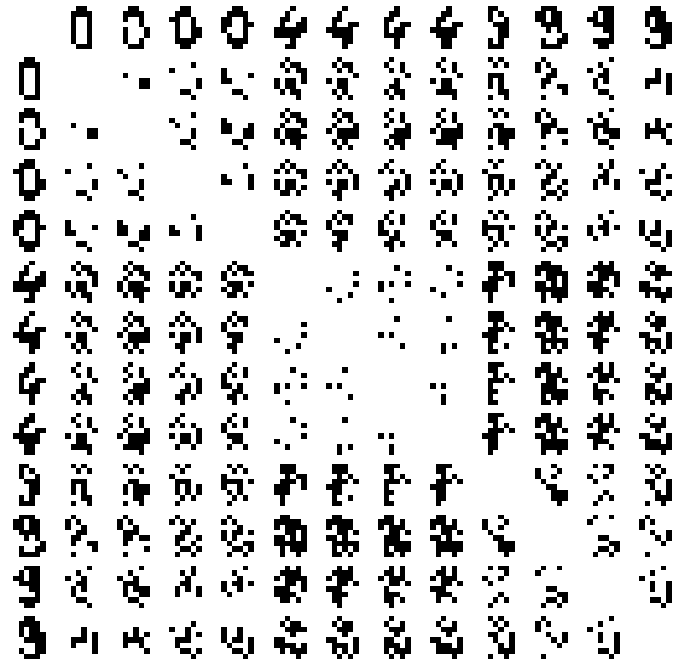

In [98]:
data = [nums[7], nums[9], nums[10], nums[11],
        nums[807], nums[802], nums[803], nums[840],
        nums[1700], nums[1701], nums[1702], nums[1703]]

fix, axes = plt.subplots(nrows=len(data)+1, ncols=len(data)+1, figsize=(12,12))

axes[0][0].axis("off")

for i in range(1, len(data)+1):
    axes[0][i].axis("off")
    axes[0][i].matshow(to_binary(data[i-1]), cmap="gray_r", vmin=0, vmax=1)
    
for j in range(1, len(data)+1):
    axes[j][0].axis("off")
    axes[j][0].matshow(to_binary(data[j-1]), cmap="gray_r", vmin=0, vmax=1)


for i in range(1, len(data)+1):
    for j in range(1, len(data)+1):
#         print("{},{}".format(i, j))
        i0 = to_binary(data[i-1])
        i1 = to_binary(data[j-1])
        similarity_matrix = sp.Matrix(np.abs(i0 - i1))
        numpy_sim_matrix = np.array(similarity_matrix).astype(np.int32)
        axes[i][j].axis('off')
        axes[i][j].matshow(numpy_sim_matrix, cmap="gray_r", vmin=0, vmax=1)
        
plt.savefig("cross.png", dpi=500, bbox_inches='tight')

In [4]:
def draw_numberline(score, axis):
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)

    # draw lines
    xmin = 0
    xmax = 10
    y = 5
    height = 1

    axis.axis("off")
    axis.hlines(y, xmin, xmax)
    axis.vlines(xmin, y - height / 2., y + height / 2.)
    axis.vlines(xmax, y - height / 2., y + height / 2.)
    
    adjusted_score = (score/64)*10

    # draw a point on the line
    axis.plot(adjusted_score, y, '|', ms = 15, mfc = 'r', label="2")

    axis.text(xmin, y + 0.8, '0', horizontalalignment='center')
    axis.text(adjusted_score, y - 4, str(score), horizontalalignment='center')
    axis.text(xmax, y + 0.8, '64', horizontalalignment='center')

In [97]:
md_4 = """
### The KNN algorithm 
How can we exploit this similarity metric to predict the digit value a new image $N$?
We can compute the similarity score between $N$ and all other images for which we know the digit number (label).
We then only consider the K images with the highest similarity score and take the majority vote of the labels for these images.
"""

In [ ]:
similarity_matrix = np.empty((len(nums), len(nums)))
for i in tqdm.tqdm(range(len(nums))):
    for j in range(len(nums)):
        similarity_matrix[i][j] =  np.linalg.norm(((to_binary(nums[i]) - to_binary(nums[j]))**2))
plt.matshow(similarity_matrix)

In [ ]:
sns.heatmap(similarity_matrix, annot = False)

In [60]:
for key in digits:
    print(key)

data
target
frame
feature_names
target_names
images
DESCR


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, shuffle=True)

# sorted_indices = np.argsort(y_train)
# X_train = X_train[sorted_indices]
# similarity_matrix = np.empty((len(X_train), len(X_train)))
# for i in tqdm.tqdm(range(len(X_train))):
#     for j in range(len(X_train)):
#         similarity_matrix[i][j] = np.sum(np.abs(to_binary(X_train[i]) - to_binary(X_train[j])))
# h = sns.heatmap(similarity_matrix, annot = False)
# plt.tight_layout()
# h.get_figure().suptitle("Similarity scores in training data (ordered by digit)")
# h.get_figure().savefig("similarity_scores_matrix", dpi=300)



predicted = []
scores = []

for d in tqdm.tqdm(X_test):
    scores = []
    for x in X_train:
        scores.append(np.sum(np.abs(to_binary(d) - to_binary(x))))
    indices = np.argsort(np.array(scores))
    neighbours = y_train[indices]
    knn = neighbours[:20]
#     print(knn)
    prediction = np.argmax(np.bincount(knn))
#     print(prediction)
    predicted.append(prediction)

print(np.count_nonzero(np.array(predicted)-y_test))


100%|██████████| 899/899 [00:11<00:00, 77.51it/s]

70


[4, 9, 1, 1, 3, 4, 3, 3, 1, 5]
[4 9 1 1 3 4 3 3 1 5]


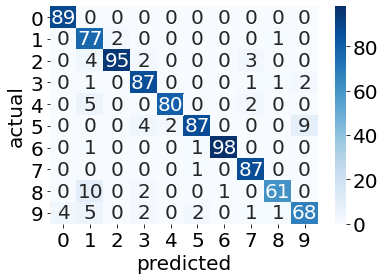

In [62]:
print(predicted[:10])
print(y_test[:10])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.array(predicted), labels=[i for i in range(10)])
g = sns.heatmap(cm, annot=True, xticklabels=True, yticklabels=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.set_xlabel("predicted")
g.set_ylabel("actual")
g.get_figure().savefig("confusion_matrix", dpi=300)

In [63]:
## Exercises should at least contain 1 correct answer!! (check before write, otherwise throw error)

e = """
$@a + @b$
"""
a = np.random.randint(0, 10)
b = np.random.randint(0, 10)

ans = a + b

params = {}
params["a"] = sp.simplify(a)
params["b"] = sp.simplify(b)

e = Exercise(MarkdownBlock(e, params))
e.add_answer(sp.simplify(ans), True, MarkdownBlock("Good job!"))
e.display()
print(e.markdown.html)
e.write()
e.publish()

AttributeError: 'Exercise' object has no attribute 'markdown'

In [64]:
print(repr(latex(sp.Matrix(2,2,[1,1,1,1]))))

NameError: name 'latex' is not defined

In [65]:
e = """
Given matrix $M = @m$, provide the matrix:

$A = @a$
"""
data = np.random.randint(0,10,(3,3))

m = sp.Matrix(data)
a = sp.Matrix(2, 2, [symbols("m_{1,1}"), symbols("m_{1,3}"), symbols("m_{3,1}"), symbols("m_{3,3}")])
print(a)

params = {}
params["m"] = sp.simplify(m)
params["a"] = sp.simplify(a)

ans = sp.Matrix([[m[0,0], m[0,2]], [m[2,0], m[2,2]]])
print(ans)

## TODO: retry with different values?
## Show answer button?
## Clear input button?

e = Exercise(MarkdownBlock(e, params))
e.add_answer(sp.simplify(ans), True, MarkdownBlock("Good job!"))
e.display()
e.write()
e.publish()

NameError: name 'symbols' is not defined

In [66]:
math = """
\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}
"""
import re
display(math)
display(HTMLMath(math))
display(Math(r"{}".format(math)))

'\n\x08egin{align}\n\\dot{x} & = \\sigma(y-x) \\\n\\dot{y} & = \rho x - y - xz \\\n\\dot{z} & = -\x08eta z + xy\n\\end{align}\n'

NameError: name 'HTMLMath' is not defined

$$(a+b)^{2} = a^{2}+2ab+b^{2}$$